In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Normalization
import seaborn as sns

In [7]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data' 
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model_year', 'origin']

data = pd.read_csv(url, names=column_names,
                    na_values='?', comment='\t',
                    sep=' ', skipinitialspace=True)

In [8]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [9]:
data = data.drop('origin', 1)
print(data.isna().sum())
data = data.dropna()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64


C:\Users\aleks\AppData\Local\Temp\ipykernel_8064\2624220024.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('origin', 1)


In [10]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 24.5 KB


In [12]:
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)

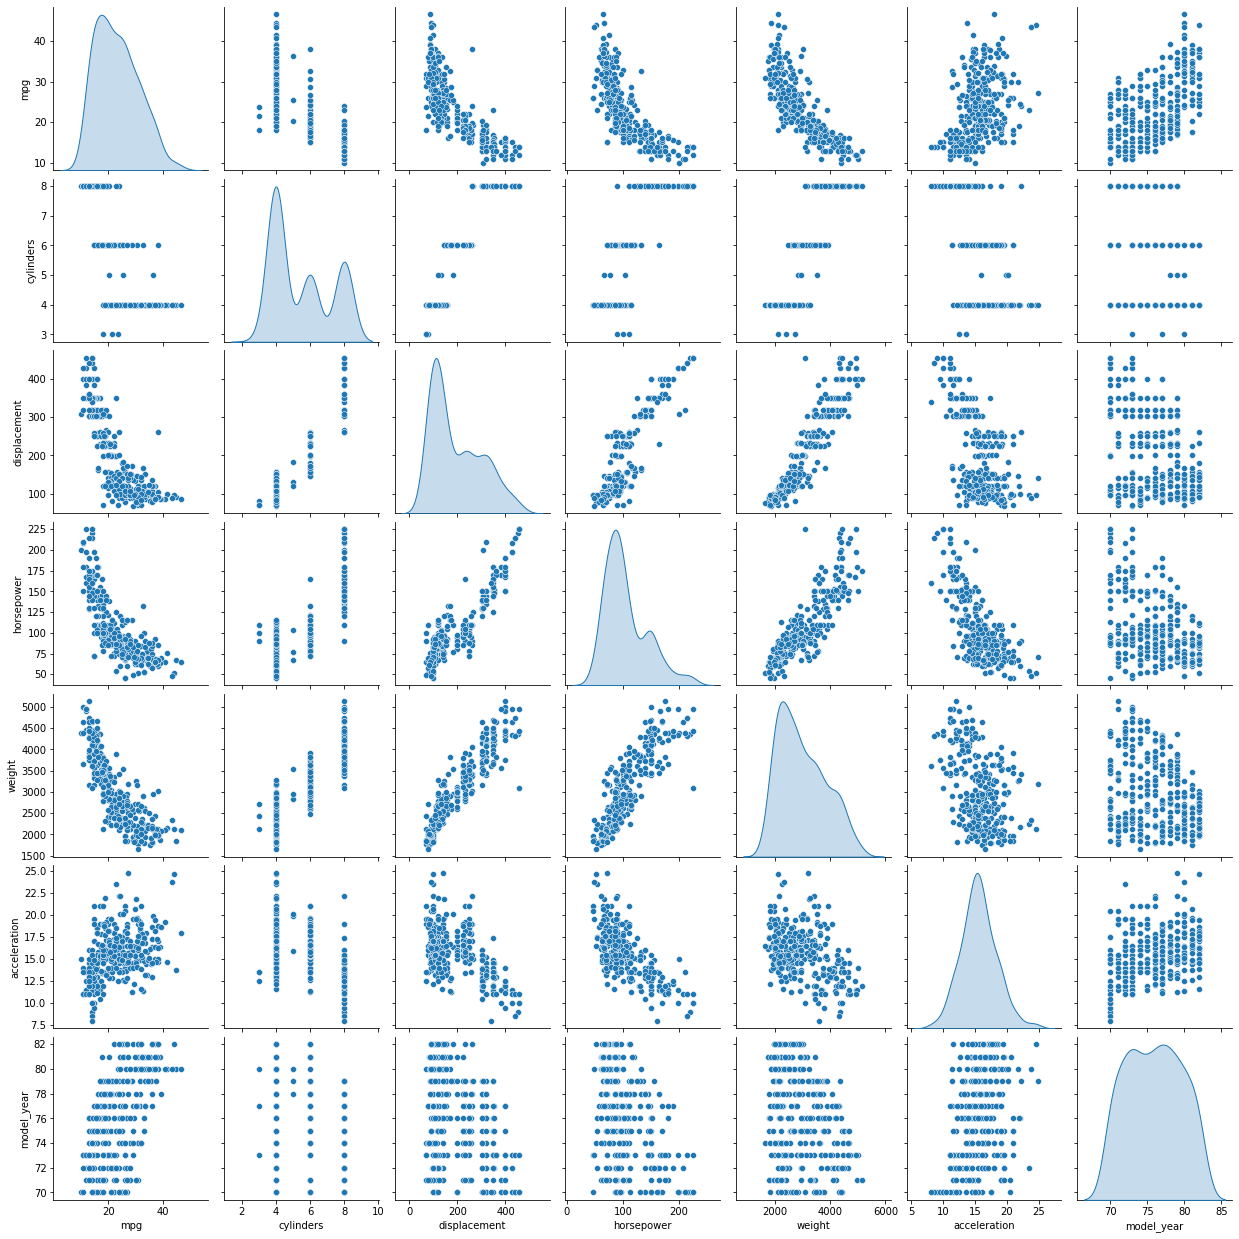

In [13]:
sns.pairplot(train_dataset[['mpg', 'cylinders', 'displacement','horsepower', 'weight', 'acceleration', 'model_year']], diag_kind='kde')

In [14]:
train_dataset.describe().transpose()[['mean','std']]

,mean,std
mpg,23.310510,7.728652
cylinders,5.477707,1.699788
displacement,195.318471,104.331589
horsepower,104.869427,38.096214
weight,2990.251592,843.898596
acceleration,15.559236,2.789230
model_year,75.898089,3.675642


In [15]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('mpg')
test_labels = test_features.pop('mpg')

In [20]:
train_labels

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: mpg, Length: 314, dtype: float64

In [18]:
data_normalizer = Normalization(axis=1)
data_normalizer.adapt(np.array(train_features))

In [21]:
data_normalizer

In [22]:
model = K.Sequential([data_normalizer,
                      Dense(64, activation='relu'),
                      Dense(32, activation='relu'),
                      Dense(1,activation=None)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 6)                13        
 ion)                                                            
                                                                 
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,574
Trainable params: 2,561
Non-trainable params: 13
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
history = model.fit(x=train_features,y=train_labels, epochs=100,verbose = 1,validation_split=0.2) 

Epoch 1/100
8/8 [==============================] - 3s 23ms/step - loss: 583.1700 - val_loss: 597.7263
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 565.5426 - val_loss: 576.7380
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 544.8262 - val_loss: 552.0687
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 520.4781 - val_loss: 522.6664
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 491.1413 - val_loss: 487.4061
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 455.6544 - val_loss: 445.2014
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 412.7312 - val_loss: 397.1003
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 366.1192 - val_loss: 344.7403
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 314.8320 - val_loss: 289.7772
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 261.2522 - val_los

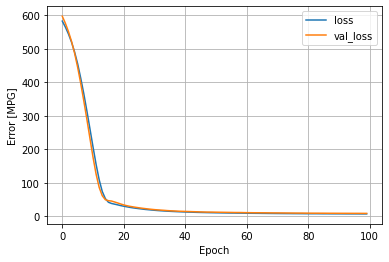

In [25]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

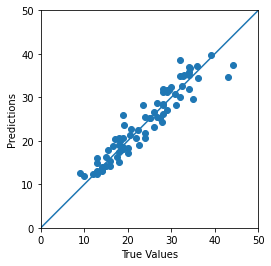

In [27]:
y_pred = model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0,50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

Text(0, 0.5, 'Count')

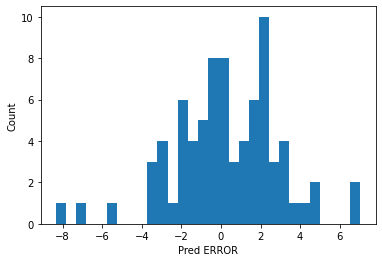

In [28]:
error = y_pred - test_labels
plt.hist(error, bins=30)
plt.xlabel('Pred ERROR')
plt.ylabel('Count')